Original Column Names:
Index(['price', 'area', 'bedrooms', 'bathrooms', 'stories', 'mainroad',
       'guestroom', 'basement', 'hotwaterheating', 'airconditioning',
       'parking', 'prefarea', 'furnishingstatus'],
      dtype='object')
Cleaned Column Names:
Index(['price', 'area', 'bedrooms', 'bathrooms', 'stories', 'mainroad',
       'guestroom', 'basement', 'hotwaterheating', 'airconditioning',
       'parking', 'prefarea', 'furnishingstatus'],
      dtype='object')
Data after dropping specified columns:
      price  area  bedrooms  bathrooms  stories mainroad guestroom basement  \
0  13300000  7420         4          2        3      yes        no       no   
1  12250000  8960         4          4        4      yes        no       no   
2  12250000  9960         3          2        2      yes        no      yes   
3  12215000  7500         4          2        2      yes        no      yes   
4  11410000  7420         4          1        2      yes       yes      yes   

  hotwaterh

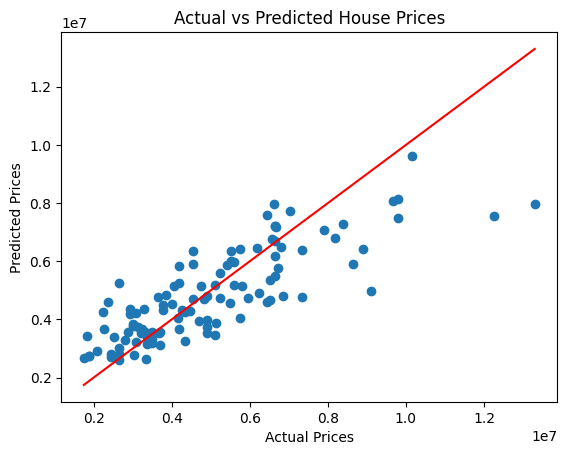

In [4]:
# Import necessary libraries
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error
import matplotlib.pyplot as plt

data = pd.read_csv(r'D:\Datasets\Housing.csv')


print("Original Column Names:")
print(data.columns)

# Strip any leading/trailing spaces from column names
data.columns = data.columns.str.strip()

# cleaned column names
print("Cleaned Column Names:")
print(data.columns)

columns_to_drop = ['Order', 'Pool QC', 'Fence', 'Misc Feature'] 
existing_columns_to_drop = [col for col in columns_to_drop if col in data.columns]
data = data.drop(existing_columns_to_drop, axis=1)

# first few rows of the dataset after dropping columns
print("Data after dropping specified columns:")
print(data.head())

numeric_cols = data.select_dtypes(include=[np.number]).columns.tolist()
data[numeric_cols] = data[numeric_cols].fillna(data[numeric_cols].mean())

# Convert categorical variables to dummy variables
data = pd.get_dummies(data, drop_first=True)  # drop_first to avoid dummy variable trap

#  Define features and target variable
X = data.drop('price', axis=1)  # Features
y = data['price']  # Target variable (house prices)

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)
print("Printing x train")
print(X_train)
print(y_test)

# Train the Linear Regression model
model = LinearRegression()
model.fit(X_train, y_train)

# Make predictions on the test set
y_pred = model.predict(X_test)

# Evaluate the model using RMSE
rmse = np.sqrt(mean_squared_error(y_test, y_pred))
print("RMSE VALUE")
print(f'RMSE: {rmse}')

# Visualize actual vs predicted prices
plt.scatter(y_test, y_pred)
plt.xlabel('Actual Prices')
plt.ylabel('Predicted Prices')
plt.title('Actual vs Predicted House Prices')
plt.plot([min(y_test), max(y_test)], [min(y_test), max(y_test)], color='red')  # Line of perfect prediction
plt.show()